CFD Sources: 
1. https://github.com/emhayki/CFD-Fundamental/blob/main/CFD-Fundamental-Guide.pdf
2. https://github.com/barbagroup/CFDPython/blob/master/lessons/01_Step_1.ipynb


Theory sources: 
3. https://www.math.toronto.edu/jko/APM346_summary_2_2020.pdf
4. https://youtu.be/ec7L8wRABy4

In [12]:
from IPython.display import Image

$$
\begin{equation}
    \rho \left( \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} + w \frac{\partial u}{\partial z} \right) = -\frac{\partial p}{\partial x} + \mu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial z^2} \right) + f_x\\
    \rho \left( \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} + w \frac{\partial v}{\partial z} \right) = -\frac{\partial p}{\partial y} + \mu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} + \frac{\partial^2 v}{\partial z^2} \right) + f_y\\
    \rho \left( \frac{\partial w}{\partial t} + u \frac{\partial w}{\partial x} + v \frac{\partial w}{\partial y} + w \frac{\partial w}{\partial z} \right) = -\frac{\partial p}{\partial z} + \mu \left( \frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 w}{\partial y^2} + \frac{\partial^2 w}{\partial z^2} \right) + f_z
\end{equation}
$$

Eq. (1) is the equation for the $x$ direction, Eq. (2) for the $y$ direction, and Eq (3) for the $z$ direction

Where: $\rho$ is the fluid density

 ,$\mu$ is the dynamic viscosity

 ,$p$ is the pressure

 ,$u, v, w$ are the velocity components in the $x, y, z$ directions, respectively

 ,$f_x, f_y, f_z$ are the body force components in the $x, y, z$ directions, respectively

Derivation of the 1-D non-linear convection equation, and it's linearization assumming a 'constant velocity' $c$ of wave like propagation. 

Assumming invicid flow, no presure gradient and no body force in the x direction Eq(1) becomes:

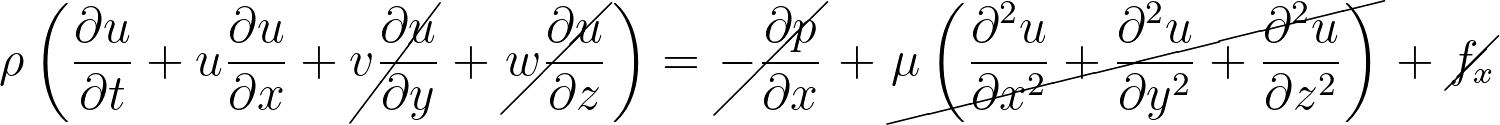

In [13]:
Image("images/simplified_ns.png")

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 \tag{4}
$$

Eq. 4 is still a non-linear equation. To linearize it we consider $u$ to be constant, then $u = c$  

The result is the 1D transport equation:

$$ \frac {\partial u}{\partial t} + c \frac {\partial u}{\partial x} = 0 \tag{5}$$

where $u(x,t)$ is the quantity being transported, c is the transport velocity, $x$ is the spatial coordinate, and $t$ is time.

To solve the linear transport equation consider the equation 5 in vector component form operations:

$$
0 = \frac {\partial u}{\partial t} + c \frac {\partial u}{\partial x} =\begin{bmatrix} \frac {\partial u}{\partial t} \\ \frac{\partial u}{\partial x} \end{bmatrix} \begin{bmatrix}
 1 & c \end{bmatrix} = \nabla u(t,x) \cdot (1, c) 
$$

The expression $\nabla u(t,x) \cdot (1, c)$ is the definition of the directional derivative of the function $u(t,x)$ in the direction of the vector $(1, c)$. With $\vec s = (1, c)$:

$$
\begin{equation}
D_{{s}}u = \nabla u(t,x) \cdot (1, c) = 0 \tag {6}
\end{equation}
$$

A zero directional derivative indicates that the rate of change of the function in a particular direction is zero. This means that the function is not changing in that direction. 


To plot the equation, using the finite difference method:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# ChatGPT's solution
#defining parameters
nx = 1000 # number of spatial points
nt = 2000 # number of time steps
L = 200.0 # length of the spatial domain
T = 200 # total time
c = 0.01 # transport velocity

dx = L/(nx - 1) # spatial step size
dt = T/nt     # time step size

# stability criterion for the explicit scheme
if c*dt/ dx > 1:
    raise ValueError("The scheme is unstable. Please adjust dx, dt, or c.")

# initialize the spatial and temporal domain
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)

# initial condition
u_initial = np.sin(np.pi*x/L)

# Initialize the solution matrix
u = np.zeros((nt, nx))
u[0, :] = u_initial

# Time-stepping loop
for n in range(0, nt-1):
    for i in range(1, nx):
        u[n+1, i] = u[n, i] - c * dt / dx * (u[n, i] - u[n, i-1])

# Plotting the solution in 3D
X, T = np.meshgrid(x, t)
print(X)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(X, T, u, cmap='viridis')

#ax.set_xlabel('Spatial coordinate (x)')
#ax.set_ylabel('Time (t)')
#ax.set_zlabel('Solution (u)')
#ax.set_title('1D Transport Equation Solution')

#plt.show()

[[  0.          0.2002002   0.4004004 ... 199.5995996 199.7997998
  200.       ]
 [  0.          0.2002002   0.4004004 ... 199.5995996 199.7997998
  200.       ]
 [  0.          0.2002002   0.4004004 ... 199.5995996 199.7997998
  200.       ]
 ...
 [  0.          0.2002002   0.4004004 ... 199.5995996 199.7997998
  200.       ]
 [  0.          0.2002002   0.4004004 ... 199.5995996 199.7997998
  200.       ]
 [  0.          0.2002002   0.4004004 ... 199.5995996 199.7997998
  200.       ]]


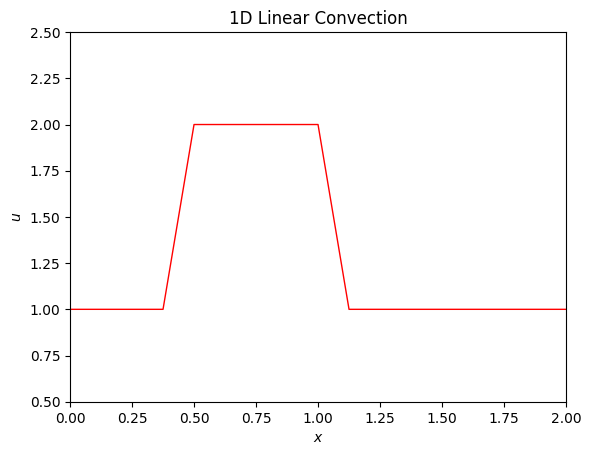

In [16]:
import matplotlib.animation as animation

########################################################
# Step 1: 1D Linear Convection
########################################################

X  = 41                    # Number of spatial points
T  = 40                    # Number of time steps
c  = 1                     # Wave speed
dt = 0.025                 # Time step size
dx = 2. / (X - 1.)         # Spatial step size

# Initialise spatial grid and initial condition
x = np.linspace(0, 5, num=X)
u = np.ones(X)
u[(x >= 0.5) & (x <= 1)] = 2

# Setup the plot
fig, ax = plt.subplots()
line, = ax.plot(x, u, 'r', linewidth=1)
ax.set_xlim(0, 2)
ax.set_ylim(0.5, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
ax.set_title('1D Linear Convection')

def animate(n):
    global u
    un = u.copy()  
    for i in range(1, X):  
        u[i] = un[i] - c * (un[i] - un[i-1]) * dt / dx
    line.set_ydata(u)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=T, interval=50)

plt.show()